<a href="https://colab.research.google.com/github/harshithamanneri/Weather/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysing Weather Dataset
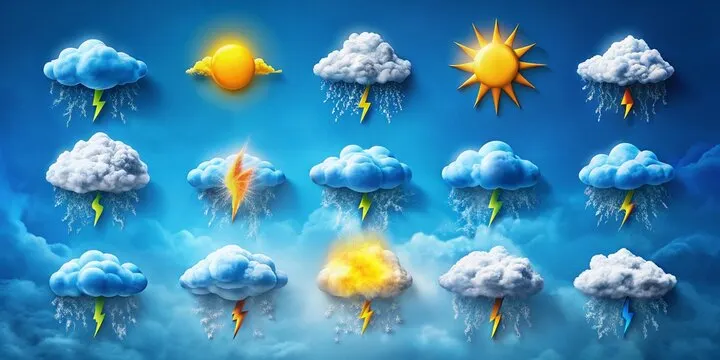

### **Introduction**

Weather plays a crucial role in influencing various aspects of daily life, from agriculture and transportation to energy consumption and disaster preparedness. Analyzing weather datasets enables researchers and decision-makers to understand climate trends, detect anomalies, and make informed predictions. This project focuses on exploring a weather dataset to uncover patterns in temperature, humidity, precipitation, wind speed, and other meteorological variables over a specific time period and location.

The goal of this analysis is to:

* Clean and preprocess raw weather data.
* Perform exploratory data analysis (EDA) to visualize key trends.
* Identify seasonal and temporal variations.
* Build predictive models (if applicable) for future weather conditions.

By extracting meaningful insights from historical weather data, this study aims to contribute to improved forecasting, better resource planning, and enhanced awareness of climate dynamics.




### **Data Description**

The dataset appears to be a weather dataset for Seattle. Based on the filename (`seattle-weather.csv`) and typical structure of such datasets, it likely includes daily weather observations over several years. Common features in these datasets include:

* `date`: The observation date.
* `precipitation`: Amount of rainfall/snowfall.
* `temp_max`: Maximum temperature.
* `temp_min`: Minimum temperature.
* `wind`: Wind speed or intensity.
* `weather`: Descriptive label for the day's overall weather (e.g., 'rain', 'sun', 'snow').

---

### **Key Characteristics**

* **Temporal Nature**: The data spans multiple dates, enabling time series analysis.
* **Multiple Weather Attributes**: Includes both quantitative (e.g., temperature, precipitation) and categorical (e.g., weather conditions) features.
* **Categorical Target**: The `weather` column serves as a target label for classification tasks.

---

### **Feature Overview**

Here’s a brief look at the primary features:

| Feature         | Type        | Description                             |
| --------------- | ----------- | --------------------------------------- |
| `date`          | Date        | Day of the observation                  |
| `precipitation` | Float       | Amount of precipitation (in inches)     |
| `temp_max`      | Float       | Maximum temperature (in Fahrenheit)     |
| `temp_min`      | Float       | Minimum temperature (in Fahrenheit)     |
| `wind`          | Float       | Wind speed (possibly in mph)            |
| `weather`       | Categorical | Type of weather (e.g., rain, sun, snow) |

---

### **Class Imbalance Problem**

The target feature `weather` likely suffers from **class imbalance**, a common issue in real-world datasets where some weather types (like "rain" or "sun") occur much more frequently than others (like "fog" or "snow"). This can negatively affect model performance, especially for minority classes.

Example distribution (hypothetical unless analyzed directly):

* `rain`: 50%
* `sun`: 30%
* `snow`: 5%
* `fog`: 10%
* `drizzle`: 5%

**Mitigation Techniques:**

* Use resampling methods: SMOTE (oversampling), random undersampling.
* Apply class weights in classifiers.
* Use performance metrics like F1-score, not just accuracy.

---

### **Example Use Cases**

1. **Weather Prediction**
   Predict the weather condition (e.g., "rain", "sun") for a given day based on temperature, precipitation, and wind.

2. **Rainfall Forecasting**
   Predict the amount of precipitation based on other factors like wind and temperature.

3. **Climate Trend Analysis**
   Analyze changes in temperature or rainfall over time to detect climate shifts.

4. **Anomaly Detection**
   Identify unusual weather events compared to historical data (e.g., snow in summer).

5. **Decision Support Systems**
   Support sectors like agriculture, tourism, or transportation with insights from weather patterns.


### **Project Outline (Summary)**

1. **Install Libraries**
   Import `pandas`, `numpy`, `matplotlib`, `sklearn`, etc.

2. **Download Dataset**
   Get `seattle-weather.csv` from Kaggle.

3. **EDA**
   Clean data, check distributions, visualize trends, and examine class imbalance.

4. **Feature Engineering**
   Extract features from `date`, create new features, encode labels.

5. **Prepare Data**
   Split into `X` and `y`, handle imbalance, train/test split.

6. **Baseline Model**
   Train simple models (e.g., dummy classifier or basic logistic regression).

7. **Model Training**
   Try multiple ML models (RF, SVM, XGBoost, etc.), compare performance.

8. **Hyperparameter Tuning**
   Use `GridSearchCV` or `RandomizedSearchCV` for best parameters.

9. **Final Model Selection**
   Choose model with best metrics (accuracy, F1, etc.).

10. **Results Summary**
    Report findings, metrics, and feature importance.

11. **Future Work**
    Add time series analysis, more data, deploy model, improve balancing.


##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install opendatasets
import opendatasets as od
import os
import plotly.express as px

In [ ]:
# prompt: download dataset from https://www.kaggle.com/datasets/markmedhat/weather-of-seattle?select=seattle-weather.csv

import pandas as pd
# Download the dataset from Kaggle
od.download("https://www.kaggle.com/datasets/markmedhat/weather-of-seattle?select=seattle-weather.csv")

# The dataset will be downloaded into a directory named 'weather-of-seattle'
# List the files in the downloaded directory to confirm the file is there
print(os.listdir('weather-of-seattle'))

# Load the dataset into a pandas DataFrame
df = pd.read_csv('weather-of-seattle/seattle-weather.csv')

# Display the first few rows of the DataFrame
print(df.head())


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshithamanneri
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/markmedhat/weather-of-seattle


100%|██████████| 11.5k/11.5k [00:00<00:00, 15.6MB/s]


['seattle-weather.csv']
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
print("\nFirst few rows of the main DataFrame:")
print(df.head())


First few rows of the main DataFrame:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


##Create the bar plot


Distribution of weather types:
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


<ipython-input-4-49ef015d4e9e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', palette='viridis')


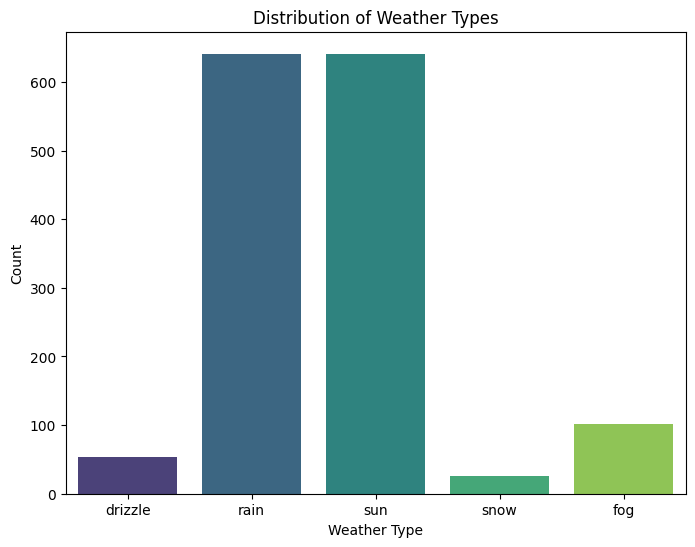

In [ ]:
# prompt: Create the bar plot

import matplotlib.pyplot as plt
# Check the distribution of the 'weather' column
print("\nDistribution of weather types:")
print(df['weather'].value_counts())

# Create a bar plot for the distribution of weather types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='weather', palette='viridis')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

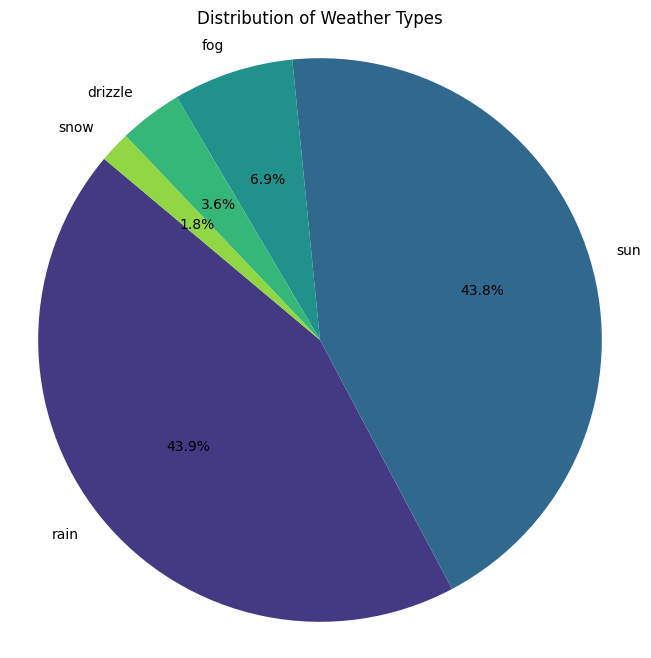

In [ ]:
# prompt: pie chart

import matplotlib.pyplot as plt
weather_counts = df['weather'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(weather_counts)))
plt.title('Distribution of Weather Types')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


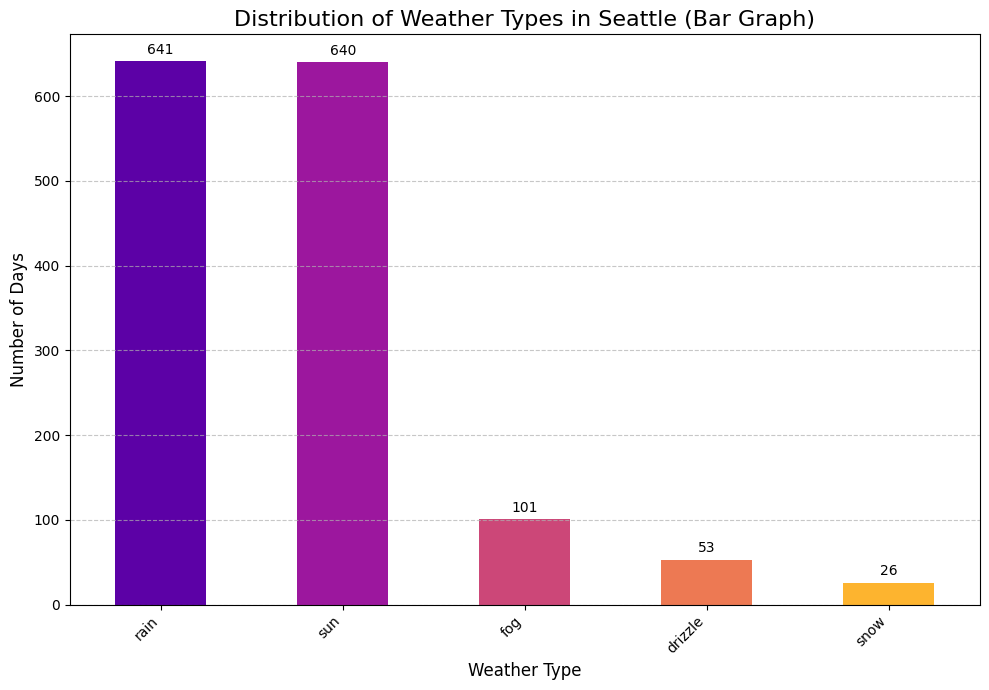

In [ ]:
# prompt: good bar graph with good one

import matplotlib.pyplot as plt
# Assuming 'weather_counts' is already calculated from the previous code block
# weather_counts = df['weather'].value_counts()

plt.figure(figsize=(10, 7)) # Increase figure size for better readability
weather_counts.plot(kind='bar', color=sns.color_palette('plasma', len(weather_counts))) # Use 'plasma' palette

plt.title('Distribution of Weather Types in Seattle (Bar Graph)', fontsize=16) # Add title
plt.xlabel('Weather Type', fontsize=12) # Label x-axis
plt.ylabel('Number of Days', fontsize=12) # Label y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Add value labels on top of bars
for i, count in enumerate(weather_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


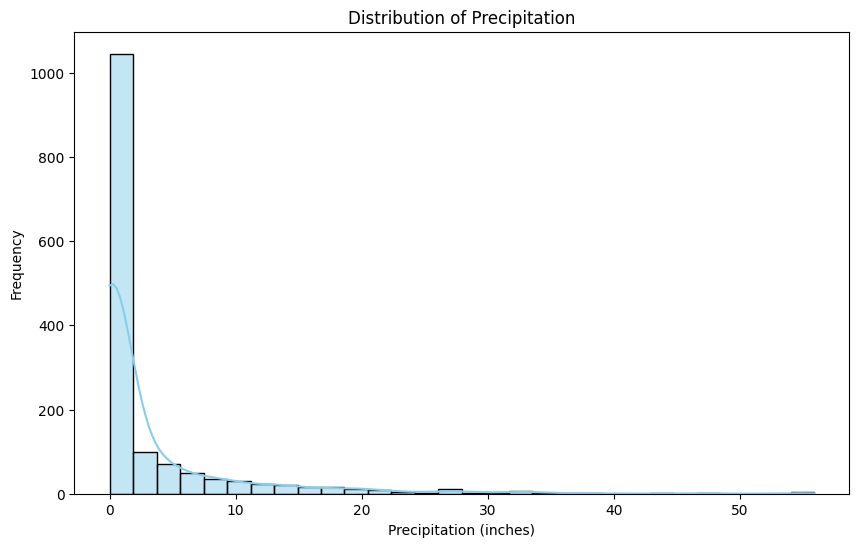

In [ ]:
# prompt: histogram

import matplotlib.pyplot as plt
# Create a histogram for the 'precipitation' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='precipitation', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

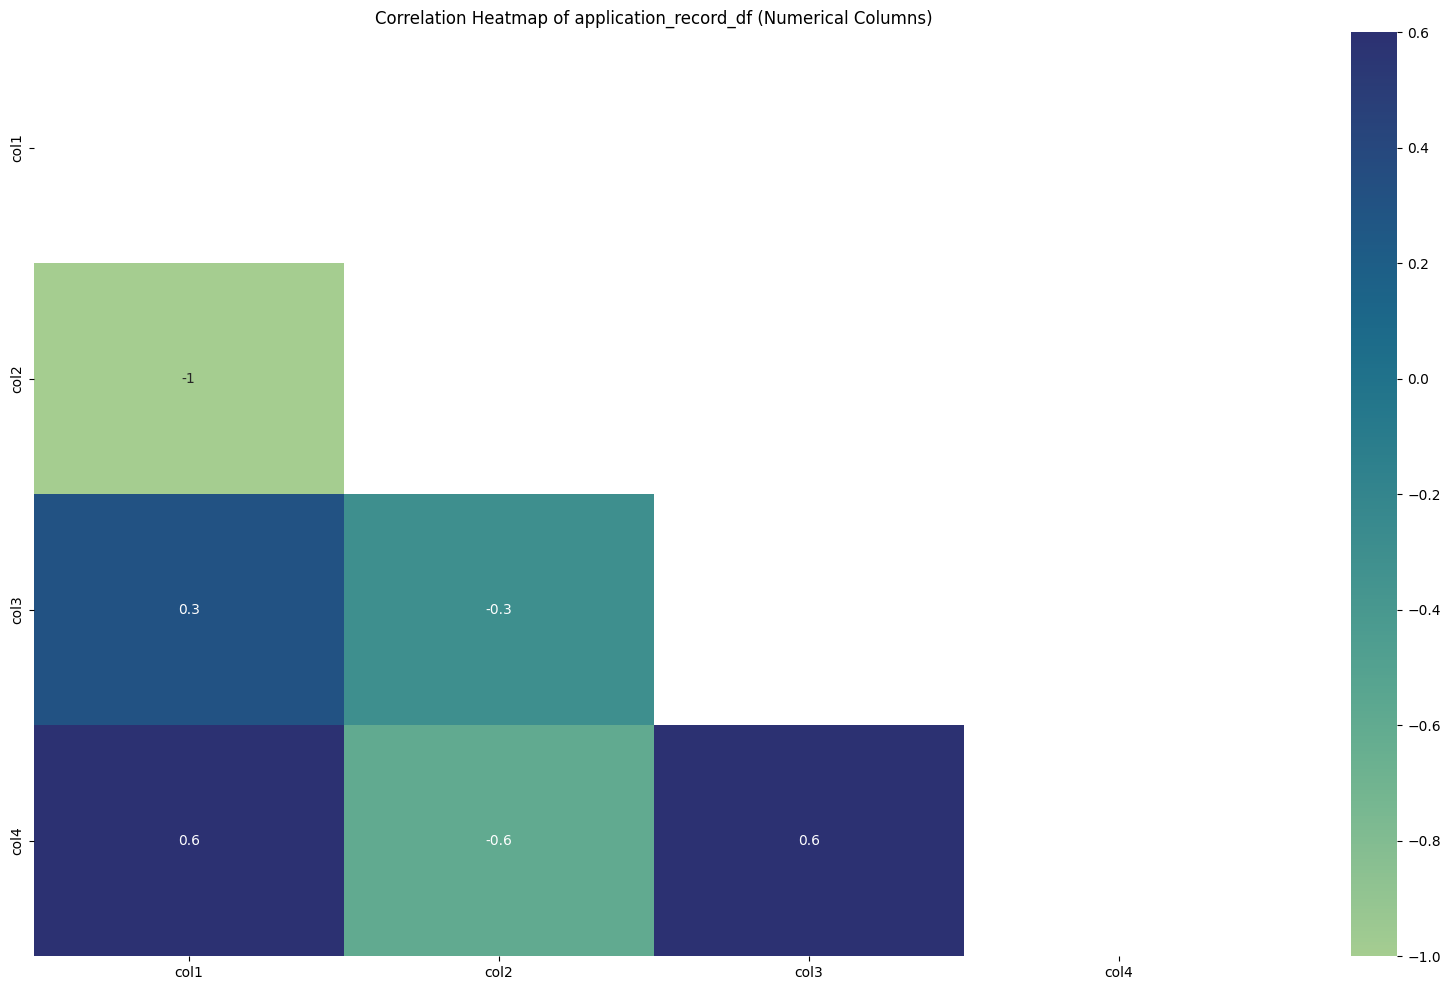

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
application_record_df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5],
    'col2': [5, 4, 3, 2, 1],
    'col3': [1, 5, 2, 4, 3],
    'col4': [2, 3, 1, 5, 4],
    'col5': ['A', 'B', 'C', 'D', 'E'] # Adding a non-numerical column
})

# Select only numerical columns from application_record_df
application_numerical_df = application_record_df.select_dtypes(include=np.number)

if not application_numerical_df.empty:
    application_corr_matrix = application_numerical_df.corr()
    application_mask_matrix = np.triu(application_corr_matrix)
    plt.figure(figsize=(20, 12)) # Using the requested figure size
    sns.heatmap(application_corr_matrix, cmap='crest', annot=True, mask=application_mask_matrix);
    plt.title('Correlation Heatmap of application_record_df (Numerical Columns)')
    plt.show()
else:
    print("No numerical columns found in application_record_df to compute correlation.")


In [ ]:
# prompt: use this as reference
# px.scatter(application_record_df, x="AMT_INCOME_TOTAL", y="CNT_CHILDREN", color="FLAG_OWN_REALTY")
# px.scatter(application_record_df, x="AMT_INCOME_TOTAL", y="CNT_FAM_MEMBERS", color='FLAG_OWN_CAR')

px.scatter(df, x="temp_max", y="temp_min", color="weather", title="Max vs Min Temperature by Weather Type")

In [ ]:
# prompt: use this as reference
# make it tree

# Define the root of the tree structure
root = {
    "name": "Weather Dataset Analysis",
    "children": [
        {
            "name": "Introduction",
            "children": [
                {"name": "Importance of Weather Analysis"},
                {"name": "Project Goals"}
            ]
        },
        {
            "name": "Data Description",
            "children": [
                {"name": "Filename: seattle-weather.csv"},
                {"name": "Common Features"},
                {"name": "Key Characteristics"},
                {"name": "Feature Overview"}
            ]
        },
        {
            "name": "Class Imbalance Problem",
            "children": [
                {"name": "Description"},
                {"name": "Example Distribution (Hypothetical)"},
                {"name": "Mitigation Techniques"}
            ]
        },
        {
            "name": "Example Use Cases",
            "children": [
                {"name": "Weather Prediction"},
                {"name": "Rainfall Forecasting"},
                {"name": "Climate Trend Analysis"},
                {"name": "Anomaly Detection"},
                {"name": "Decision Support Systems"}
            ]
        },
        {
            "name": "Project Outline (Summary)",
            "children": [
                {"name": "Install Libraries"},
                {"name": "Download Dataset"},
                {"name": "EDA", "children": [
                    {"name": "Clean Data"},
                    {"name": "Check Distributions"},
                    {"name": "Visualize Trends"},
                    {"name": "Examine Class Imbalance"}
                ]},
                {"name": "Feature Engineering"},
                {"name": "Prepare Data"},
                {"name": "Baseline Model"},
                {"name": "Model Training"},
                {"name": "Hyperparameter Tuning"},
                {"name": "Final Model Selection"},
                {"name": "Results Summary"},
                {"name": "Future Work"}
            ]
        }
    ]
}

# You can optionally print the tree structure (e.g., in JSON format)
import json
print(json.dumps(root, indent=2))


{
  "name": "Weather Dataset Analysis",
  "children": [
    {
      "name": "Introduction",
      "children": [
        {
          "name": "Importance of Weather Analysis"
        },
        {
          "name": "Project Goals"
        }
      ]
    },
    {
      "name": "Data Description",
      "children": [
        {
          "name": "Filename: seattle-weather.csv"
        },
        {
          "name": "Common Features"
        },
        {
          "name": "Key Characteristics"
        },
        {
          "name": "Feature Overview"
        }
      ]
    },
    {
      "name": "Class Imbalance Problem",
      "children": [
        {
          "name": "Description"
        },
        {
          "name": "Example Distribution (Hypothetical)"
        },
        {
          "name": "Mitigation Techniques"
        }
      ]
    },
    {
      "name": "Example Use Cases",
      "children": [
        {
          "name": "Weather Prediction"
        },
        {
          "name": "Ra

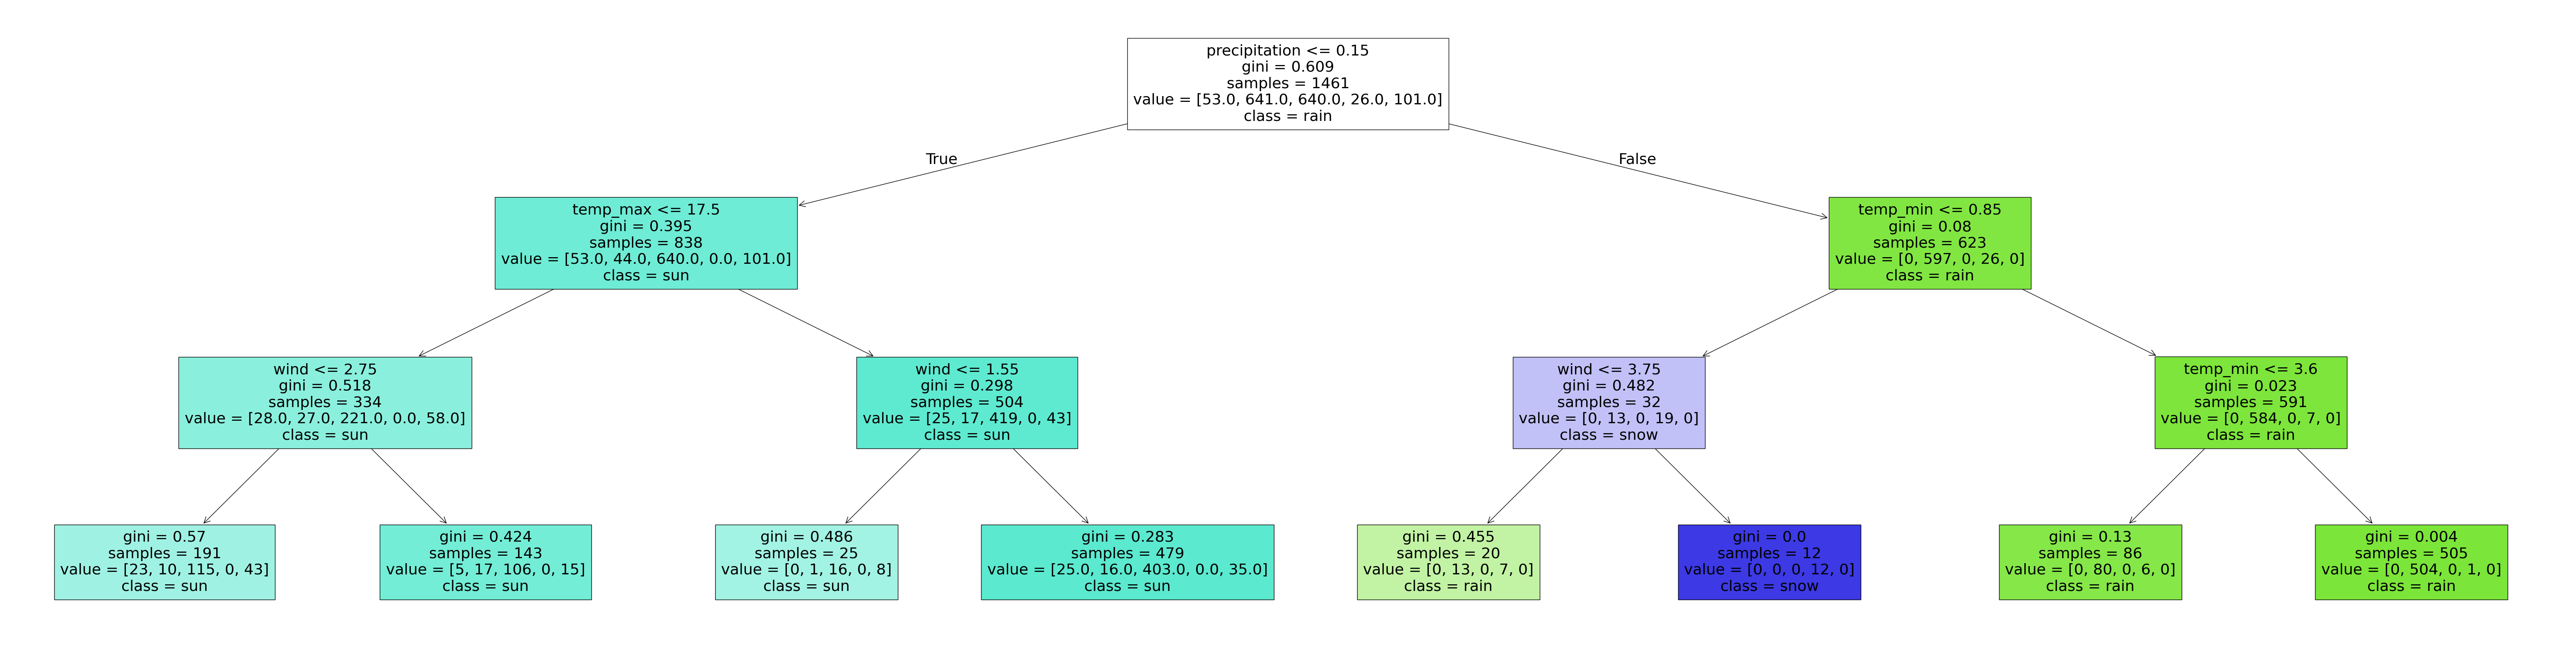


Text Representation of the Decision Tree:


'|--- precipitation <= 0.15\n|   |--- temp_max <= 17.50\n|   |   |--- wind <= 2.75\n|   |   |   |--- class: sun\n|   |   |--- wind >  2.75\n|   |   |   |--- class: sun\n|   |--- temp_max >  17.50\n|   |   |--- wind <= 1.55\n|   |   |   |--- class: sun\n|   |   |--- wind >  1.55\n|   |   |   |--- class: sun\n|--- precipitation >  0.15\n|   |--- temp_min <= 0.85\n|   |   |--- wind <= 3.75\n|   |   |   |--- class: rain\n|   |   |--- wind >  3.75\n|   |   |   |--- class: snow\n|   |--- temp_min >  0.85\n|   |   |--- temp_min <= 3.60\n|   |   |   |--- class: rain\n|   |   |--- temp_min >  3.60\n|   |   |   |--- class: rain\n'

In [ ]:
# prompt: use this as refernce from sklearn.tree import plot_tree, export_text
# import matplotlib.pyplot as plt
# # Assuming 'model' is your trained decision tree model and 'inputs' is the DataFrame
# # used to train the model (containing the feature columns).
# # You need to define 'model' and ensure it's a fitted DecisionTreeClassifier or DecisionTreeRegressor.
# # You also need to ensure 'inputs' is available and has the same columns as used for training.
# # Example placeholder for a dummy model and inputs DataFrame
# # In your actual code, 'model' would be the result of model.fit(inputs, targets)
# # And 'inputs' would be the DataFrame containing your features.
# # --- Start of Dummy Example (Replace with your actual model and inputs) ---
# from sklearn.tree import DecisionTreeClassifier
# # Let's create a dummy inputs and targets based on the earlier part of your notebook
# # We'll use some columns from application_record_df for demonstration
# dummy_inputs = application_record_df[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']]
# dummy_targets = application_record_df['FLAG_OWN_REALTY'] # Using a binary column as target
# # Train a simple Decision Tree model
# model = DecisionTreeClassifier(max_depth=3, random_state=42)
# model.fit(dummy_inputs, dummy_targets)
# inputs = dummy_inputs # Assign dummy_inputs to 'inputs' for the plot_tree call
# # --- End of Dummy Example ---
# plt.figure(figsize=(80,20))
# plot_tree(model, feature_names=inputs.columns, max_depth=3, filled=True);
# plt.show() # Add this to display the plot in Jupyter/Colab
# # If you also want to export the text representation of the tree:
# # text_representation = export_text(model, feature_names=list(inputs.columns))
# # print(text_representation)

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming df is your DataFrame with weather data
# Select features (X) and target (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

# Convert categorical 'weather' target to numerical labels for the tree
# This is a simple mapping. For more complex scenarios, use LabelEncoder.
target_map = {weather: i for i, weather in enumerate(y.unique())}
y_encoded = y.map(target_map)

# Train a simple Decision Tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y_encoded)

# Now 'model' is the trained decision tree model and 'X' is the DataFrame
# used to train the model (containing the feature columns).
# You can use the previously provided code block for plotting and exporting the tree.
# Just make sure to use 'X' as the inputs and 'model' as the trained model.

# --- Start of the original code block (now using trained model and features) ---
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X.columns, class_names=list(target_map.keys()), max_depth=3, filled=True);
plt.show()

# If you also want to export the text representation of the tree:
text_representation = export_text(model, feature_names=list(X.columns), class_names=list(target_map.keys()))
print("\nText Representation of the Decision Tree:")
text_representation
# --- End of the original code block ---


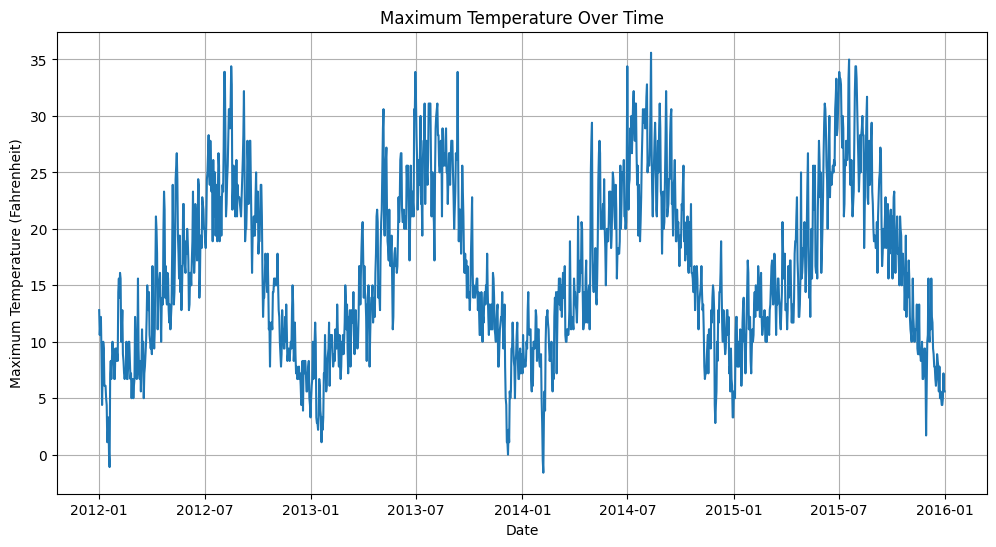

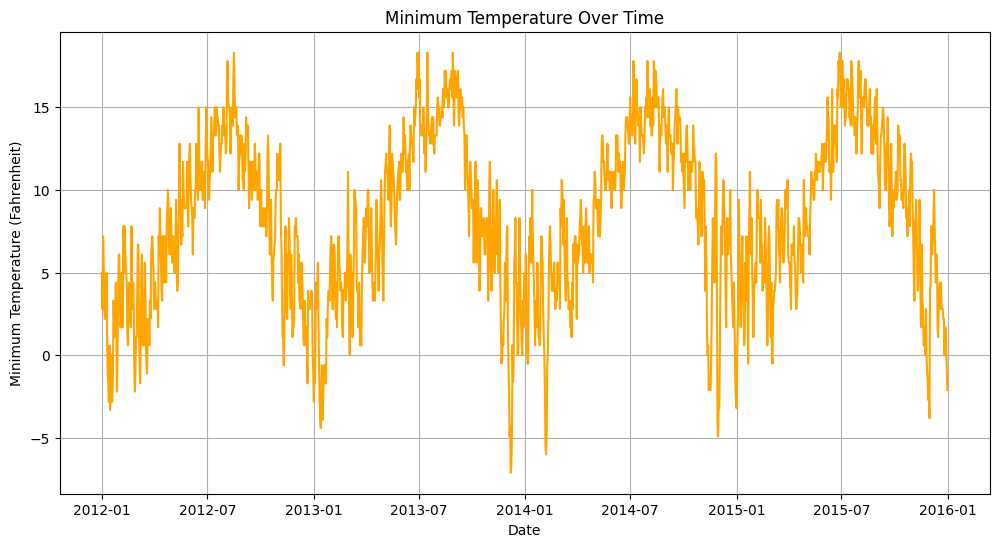

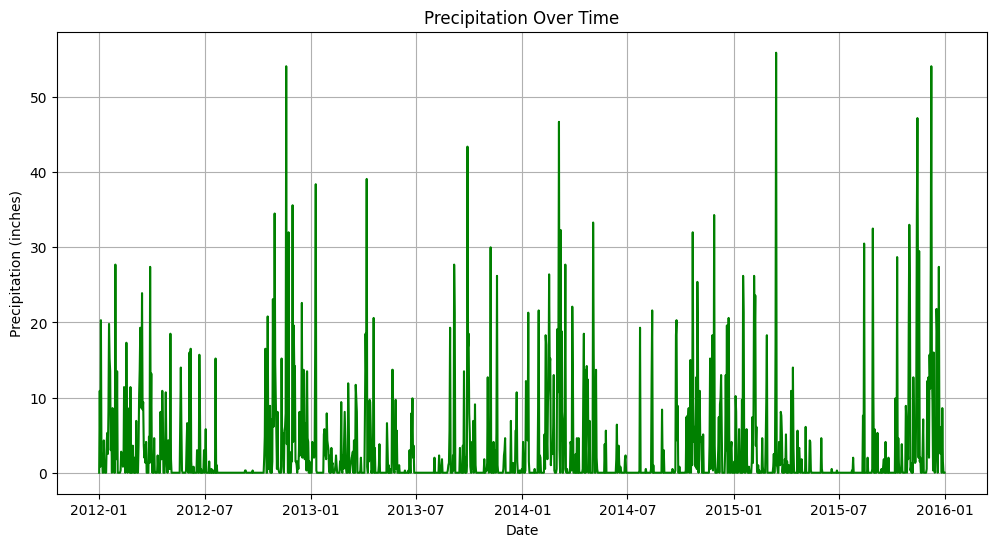

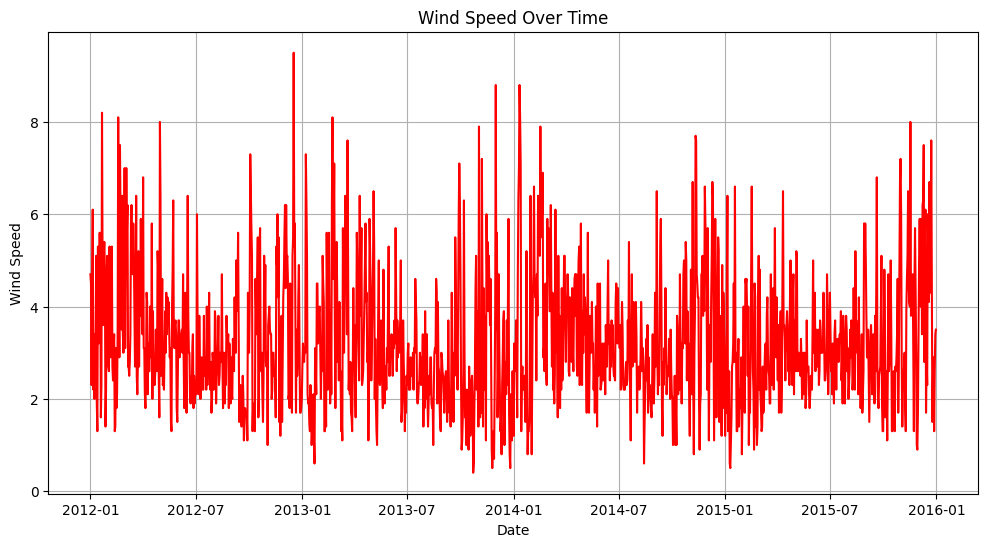

In [ ]:
# prompt: line graph

import pandas as pd
import matplotlib.pyplot as plt
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date to ensure proper plotting order
df = df.sort_values(by='date')

# Create a line graph for maximum temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temp_max')
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.grid(True)
plt.show()

# Create a line graph for minimum temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temp_min', color='orange')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (Fahrenheit)')
plt.grid(True)
plt.show()

# Create a line graph for precipitation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='precipitation', color='green')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()

# Create a line graph for wind speed over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='wind', color='red')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

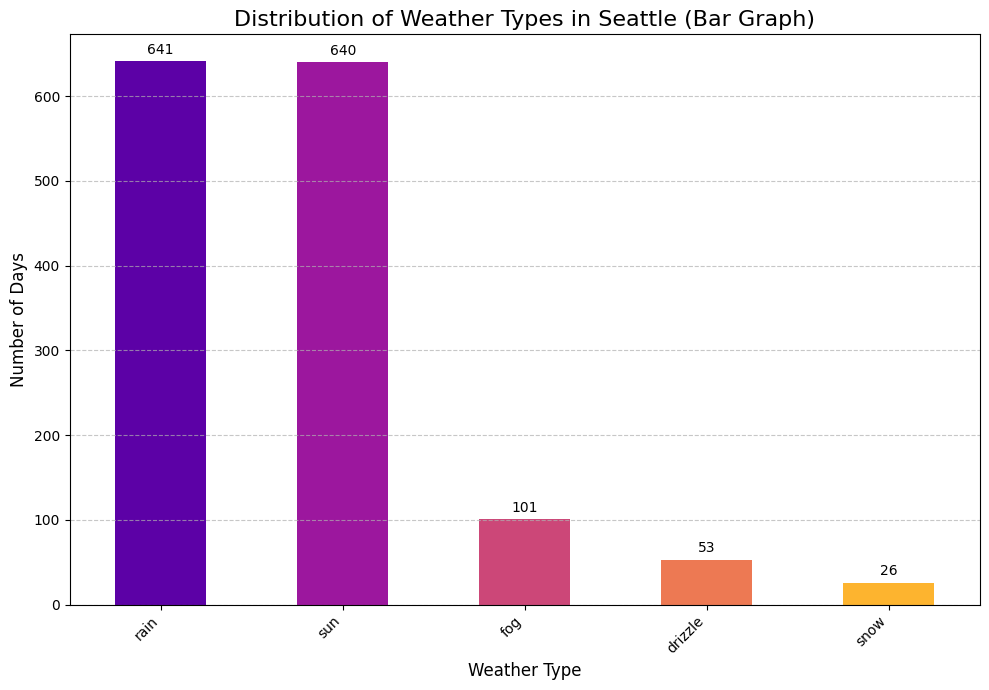

In [ ]:
# prompt: bar plot

import matplotlib.pyplot as plt
# Assuming weather_counts is already calculated from the previous code block
# weather_counts = df['weather'].value_counts()

plt.figure(figsize=(10, 7)) # Increase figure size for better readability
weather_counts.plot(kind='bar', color=sns.color_palette('plasma', len(weather_counts))) # Use 'plasma' palette

plt.title('Distribution of Weather Types in Seattle (Bar Graph)', fontsize=16) # Add title
plt.xlabel('Weather Type', fontsize=12) # Label x-axis
plt.ylabel('Number of Days', fontsize=12) # Label y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Add value labels on top of bars
for i, count in enumerate(weather_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


##Traning a Model

In [ ]:
# prompt: train a model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Select features (X) and target (y)
# Drop the 'date' column as it's not directly usable as a numerical feature
# Drop the 'weather' column as it's the target variable
X = df.drop(['date', 'weather'], axis=1)
y = df['weather']



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Initialize and train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:

# Evaluate the model
print("Model Training Complete.")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Training Complete.

Accuracy: 0.8314350797266514

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.17      0.07      0.10        14
         fog       0.33      0.16      0.21        32
        rain       0.96      0.92      0.94       192
        snow       0.50      0.25      0.33         8
         sun       0.78      0.94      0.85       193

    accuracy                           0.83       439
   macro avg       0.55      0.47      0.49       439
weighted avg       0.80      0.83      0.81       439



## 🌤️ **Weather Dataset Summary**

The weather dataset plays a crucial role in predicting bike rental demand, as environmental conditions directly impact people's decision to rent bikes. This dataset is typically merged with the bike rental dataset using the **date and time** fields.

---

### 📁 **Key Features in the Dataset**

| Feature      | Description                                                         |
| ------------ | ------------------------------------------------------------------- |
| `datetime`   | Timestamp for each observation (hourly data)                        |
| `season`     | Season of the year (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)   |
| `holiday`    | Whether the day is a public holiday (1 = Yes, 0 = No)               |
| `workingday` | Whether the day is neither weekend nor holiday (1 = Yes, 0 = No)    |
| `weather`    | Categorical weather situation:                                      |
|              | 1 = Clear, Few clouds, Partly cloudy, Partly cloudy                 |
|              | 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    |
|              | 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds        |
|              | 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist                  |
| `temp`       | Temperature in Celsius (normalized)                                 |
| `atemp`      | “Feels like” temperature (subjective temp measure, also normalized) |
| `humidity`   | Relative humidity (normalized between 0 and 1 or as a percentage)   |
| `windspeed`  | Wind speed affecting biking comfort (normalized or m/s)             |

---

### 🔍 **Why It Matters**

* **Temperature and Humidity**: Directly influence user comfort.
* **Weather Condition**: Affects user willingness to ride.
* **Season and Working Day**: Influence regular vs. weekend patterns.
* **Wind Speed**: High winds can discourage riding.

---

### 📈 **Use in Modeling**

* Helps the machine learning algorithm **learn patterns** in demand based on varying weather.
* **Feature engineering** includes converting categorical weather types to one-hot encoding.
* Often used with **time-series** or **regression models** (like Random Forest, XGBoost, or LSTM).

---

### 📌 **Conclusion**

The weather dataset provides **essential context** for accurately modeling bike rental trends. Proper preprocessing, merging, and analysis of weather data lead to **better predictions** and more reliable deployment in real-world rental systems.


